## Install Keras-Tuner

In [42]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Dependancies

In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

## Preprocess The Data

In [44]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"])

In [45]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T25','T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

In [46]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classifications_to_replace[classifications_to_replace <= 200].index

application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace, "Other")
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [47]:
application_df.nunique()

STATUS                             2
ASK_AMT                         8747
IS_SUCCESSFUL                      2
APPLICATION_TYPE_Other             2
APPLICATION_TYPE_T10               2
APPLICATION_TYPE_T12               2
APPLICATION_TYPE_T13               2
APPLICATION_TYPE_T19               2
APPLICATION_TYPE_T2                2
APPLICATION_TYPE_T3                2
APPLICATION_TYPE_T4                2
APPLICATION_TYPE_T5                2
APPLICATION_TYPE_T6                2
APPLICATION_TYPE_T7                2
APPLICATION_TYPE_T8                2
APPLICATION_TYPE_T9                2
AFFILIATION_CompanySponsored       2
AFFILIATION_Family/Parent          2
AFFILIATION_Independent            2
AFFILIATION_National               2
AFFILIATION_Other                  2
AFFILIATION_Regional               2
CLASSIFICATION_C1000               2
CLASSIFICATION_C1200               2
CLASSIFICATION_C1700               2
CLASSIFICATION_C2000               2
CLASSIFICATION_C2100               2
C

In [48]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(["IS_SUCCESSFUL"],axis=1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [49]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model

Optimization Attempt 1

Add 2 more layers and increase units

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 800
layer2 = 300
layer3 = 200
layer4 = 100
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 800)               40000     
                                                                 
 dense_42 (Dense)            (None, 300)               240300    
                                                                 
 dense_43 (Dense)            (None, 200)               60200     
                                                                 
 dense_44 (Dense)            (None, 100)               20100     
                                                                 
 dense_45 (Dense)            (None, 1)                 101       
                                                                 
Total params: 360,701
Trainable params: 360,701
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 15s 17ms/step - loss: 0.5694 - accuracy: 0.7231
Epoch 2/100
804/804 [==============================] - 13s 17ms/step - loss: 0.5575 - accuracy: 0.7279
Epoch 3/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5524 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5518 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5507 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5495 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 8s 11ms/step - loss: 0.5477 - accuracy: 0.7330
Epoch 8/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5463 - accuracy: 0.7341
Epoch 9/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5460 - accuracy: 0.7346
Epoch 10/100
804/804 [==============================] - 8s 10ms/step - loss: 0.544

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5793434381484985, Accuracy: 0.7295626997947693


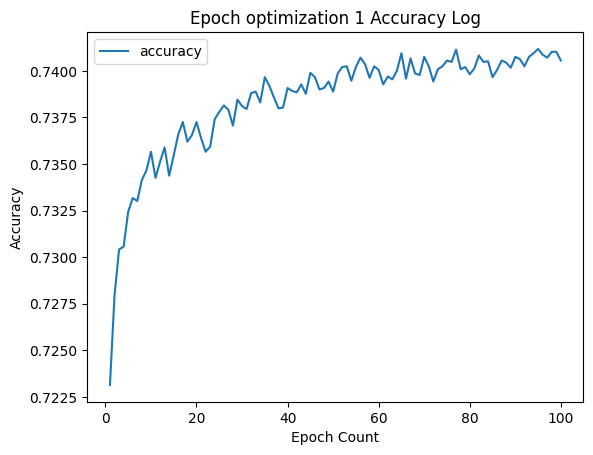

In [54]:
# plotting the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y = 'accuracy', title='Epoch optimization 1 Accuracy Log')
fig = plot.get_figure()
fig.savefig("epoch optimization 1.png")

In [55]:
nn.save('Optimization_model_1.h5')

Optimization Attempt 2

Increase epochs, changed layer units, and changed the activation to Tanh

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 400
layer2 = 200
layer3 = 120
layer4 = 40
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=layer1, input_dim=features, activation="tanh"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=layer3, activation="tanh"))

# Fourth hidden layer
nn2.add(tf.keras.layers.Dense(units=layer4, activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 400)               20000     
                                                                 
 dense_47 (Dense)            (None, 200)               80200     
                                                                 
 dense_48 (Dense)            (None, 120)               24120     
                                                                 
 dense_49 (Dense)            (None, 40)                4840      
                                                                 
 dense_50 (Dense)            (None, 1)                 41        
                                                                 
Total params: 129,201
Trainable params: 129,201
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
fit_model = nn2.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150
804/804 [==============================] - 5s 4ms/step - loss: 0.5708 - accuracy: 0.7216
Epoch 2/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5567 - accuracy: 0.7273
Epoch 3/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5535 - accuracy: 0.7276
Epoch 4/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5515 - accuracy: 0.7298
Epoch 5/150
804/804 [==============================] - 4s 4ms/step - loss: 0.5504 - accuracy: 0.7295
Epoch 6/150
804/804 [==============================] - 4s 4ms/step - loss: 0.5495 - accuracy: 0.7303
Epoch 7/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5483 - accuracy: 0.7314
Epoch 8/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5467 - accuracy: 0.7326
Epoch 9/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5464 - accuracy: 0.7320
Epoch 10/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5459 - accura

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=3)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5604413151741028, Accuracy: 0.7272303104400635


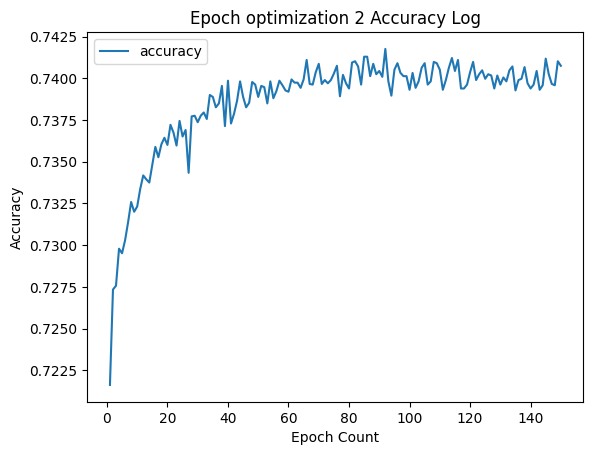

In [60]:
# plotting the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y = 'accuracy', title='Epoch optimization 2 Accuracy Log')
fig = plot.get_figure()
fig.savefig("epoch optimization 2.png")

In [61]:
nn2.save('Optimization_model_2.h5')

Optimization Attempt 3

Added 2 more layers, changed the activation to Sigmoid, and changed the amount of units on each layer

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 500
layer2 = 400
layer3 = 300
layer4 = 200
layer5 = 100
layer6 = 50




nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=layer1, input_dim=features, activation="sigmoid"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=layer2, activation="sigmoid"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=layer3, activation="sigmoid"))

# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=layer4, activation="sigmoid"))

# Fifth hidden layer
nn3.add(tf.keras.layers.Dense(units=layer5, activation="sigmoid"))

# Sixth hidden layer
nn3.add(tf.keras.layers.Dense(units=layer6, activation="sigmoid"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 500)               25000     
                                                                 
 dense_52 (Dense)            (None, 400)               200400    
                                                                 
 dense_53 (Dense)            (None, 300)               120300    
                                                                 
 dense_54 (Dense)            (None, 200)               60200     
                                                                 
 dense_55 (Dense)            (None, 100)               20100     
                                                                 
 dense_56 (Dense)            (None, 50)                5050      
                                                                 
 dense_57 (Dense)            (None, 1)                

In [63]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
fit_model = nn3.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150
804/804 [==============================] - 10s 10ms/step - loss: 0.6977 - accuracy: 0.5241
Epoch 2/150
804/804 [==============================] - 10s 12ms/step - loss: 0.6274 - accuracy: 0.6574
Epoch 3/150
804/804 [==============================] - 10s 12ms/step - loss: 0.5800 - accuracy: 0.7267
Epoch 4/150
804/804 [==============================] - 8s 10ms/step - loss: 0.5764 - accuracy: 0.7261
Epoch 5/150
804/804 [==============================] - 10s 13ms/step - loss: 0.5744 - accuracy: 0.7261
Epoch 6/150
804/804 [==============================] - 10s 12ms/step - loss: 0.5715 - accuracy: 0.7271
Epoch 7/150
804/804 [==============================] - 10s 13ms/step - loss: 0.5713 - accuracy: 0.7287
Epoch 8/150
804/804 [==============================] - 8s 10ms/step - loss: 0.5686 - accuracy: 0.7261
Epoch 9/150
804/804 [==============================] - 9s 11ms/step - loss: 0.5661 - accuracy: 0.7275
Epoch 10/150
804/804 [==============================] - 9s 12ms/step - loss:

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5565107464790344, Accuracy: 0.728863000869751


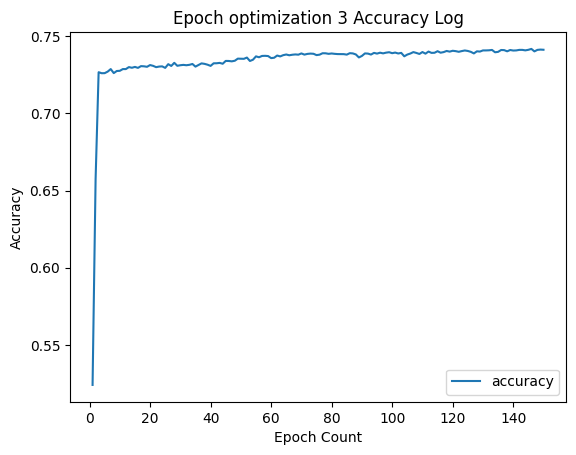

In [66]:
# plotting the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y = 'accuracy', title='Epoch optimization 3 Accuracy Log')
fig = plot.get_figure()
fig.savefig("epoch optimization 3.png")

In [67]:
nn3.save('Optimization_model_3.h5')

Optimization Attempt 4

Reduced layers to 3 and significantly increased the units for the starting layer. Changed activation back to relu based on the above optimization results

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 2000
layer2 = 1000
layer3 = 500






nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=layer1, input_dim=features, activation="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=layer2,  input_dim=features, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=layer3,  input_dim=features, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1,  input_dim=features, activation="sigmoid"))
# Check the structure of the model
nn4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 2000)              100000    
                                                                 
 dense_59 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_60 (Dense)            (None, 500)               500500    
                                                                 
 dense_61 (Dense)            (None, 200)               100200    
                                                                 
 dense_62 (Dense)            (None, 100)               20100     
                                                                 
 dense_63 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,721,901
Trainable params: 2,721,901
N

In [69]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
fit_model = nn4.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 38s 45ms/step - loss: 0.5733 - accuracy: 0.7200
Epoch 2/50
804/804 [==============================] - 43s 53ms/step - loss: 0.5584 - accuracy: 0.7277
Epoch 3/50
804/804 [==============================] - 40s 50ms/step - loss: 0.5548 - accuracy: 0.7301
Epoch 4/50
804/804 [==============================] - 40s 50ms/step - loss: 0.5520 - accuracy: 0.7314
Epoch 5/50
804/804 [==============================] - 41s 51ms/step - loss: 0.5516 - accuracy: 0.7313
Epoch 6/50
804/804 [==============================] - 39s 48ms/step - loss: 0.5497 - accuracy: 0.7322
Epoch 7/50
804/804 [==============================] - 40s 50ms/step - loss: 0.5487 - accuracy: 0.7327
Epoch 8/50
804/804 [==============================] - 39s 49ms/step - loss: 0.5474 - accuracy: 0.7328
Epoch 9/50
804/804 [==============================] - 35s 44ms/step - loss: 0.5472 - accuracy: 0.7336
Epoch 10/50
804/804 [==============================] - 41s 51ms/step - loss: 0.546

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5603 - accuracy: 0.7287 - 2s/epoch - 9ms/step
Loss: 0.5602707266807556, Accuracy: 0.7287463545799255


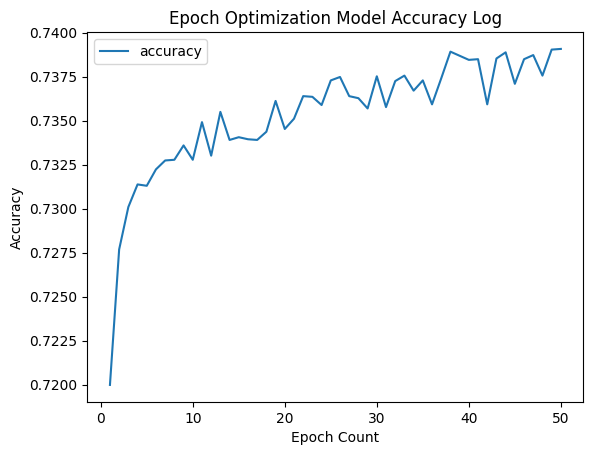

In [76]:
# plotting the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y = 'accuracy', title='Epoch Optimization Model Accuracy Log')
fig = plot.get_figure()
fig.savefig("AlphabetSoupCharity_Optimization.png")

In [77]:
nn4.save('AlphabetSoupCharity_Optimization.h5')